In [1]:
import pandas as pd
import numpy as np
import missingno

In [7]:
df=pd.read_csv('final_attack_file.csv')
df

C:\Users\lif\AppData\Local\Temp\ipykernel_12728\2746363469.py:1: DtypeWarning: Columns (0,2,4,7,8,9,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('final_attack_file.csv')


ts                 id.orig_h id.orig_p       id.resp_h  \
0      1688523383             192.168.0.165     34316     224.0.0.251   
1      1688523383  fe80::577:447c:19ae:cff5     38222        ff02::fb   
2      1688523384             192.168.0.165     60018     224.0.0.251   
3      1688523384  fe80::577:447c:19ae:cff5     57724        ff02::fb   
4      1688523385             192.168.0.165     43083     224.0.0.251   
...           ...                       ...       ...             ...   
52601  1686857466              192.168.1.26     56935    132.163.96.2   
52602  1686857459              192.168.1.26     42699     129.6.15.29   
52603  1686857510              192.168.1.26     52955   192.36.144.22   
52604  1686857467              192.168.1.26     36191  131.107.13.100   
52605  1686857465              192.168.1.26     34069  128.138.140.44   

      id.resp_p proto service  duration orig_bytes resp_bytes conn_state  \
0          5353   udp     dns  0.000936         45          0         S0   
1          5353   udp     dns  0.000944         45          0         S0   
2          5353   udp     dns  0.000799         46          0         S0   
3          5353   udp     dns  0.001447         46          0         S0   
4          5353   udp     dns  0.002282         29          0         S0   
...         ...   ...     ...       ...        ...        ...        ...   
52601       123   udp     ntp       NaN        NaN        NaN         S0   
52602       123   udp     ntp       NaN        NaN        NaN         S0   
52603       123   udp     ntp       NaN        NaN        NaN         S0   
52604       123   udp     ntp       NaN        NaN        NaN         S0   
52605       123   udp     ntp       NaN        NaN        NaN         S0   

      missed_bytes history orig_pkts orig_ip_bytes resp_pkts resp_ip_bytes  \
0                0      CD         1            73         0             0   
1                0      CD         1            93         0             0   
2                0      CD         1            74         0             0   
3                0      CD         1            94         0             0   
4                0      CD         1            57         0             0   
...            ...     ...       ...           ...       ...           ...   
52601            0       D         1            76         0             0   
52602            0       D         1            76         0             0   
52603            0       D         1            76         0             0   
52604            0       D         1            76         0             0   
52605            0       D         1            76         0             0   

       label detailed_label  
0          1      malicious  
1          1      malicious  
2          1      malicious  
3          1      malicious  
4          1      malicious  
...      ...            ...  
52601      1      malicious  
52602      1      malicious  
52603      1      malicious  
52604      1      malicious  
52605      1      malicious  

[52606 rows x 19 columns]

ts                    0
id.orig_h             0
id.orig_p             0
id.resp_h             0
id.resp_p             0
proto                 0
service               0
duration          33326
orig_bytes        33326
resp_bytes        33326
conn_state            0
missed_bytes          0
history               0
orig_pkts             0
orig_ip_bytes         0
resp_pkts             0
resp_ip_bytes         0
label                 0
detailed_label        0
dtype: int64


<Axes: >

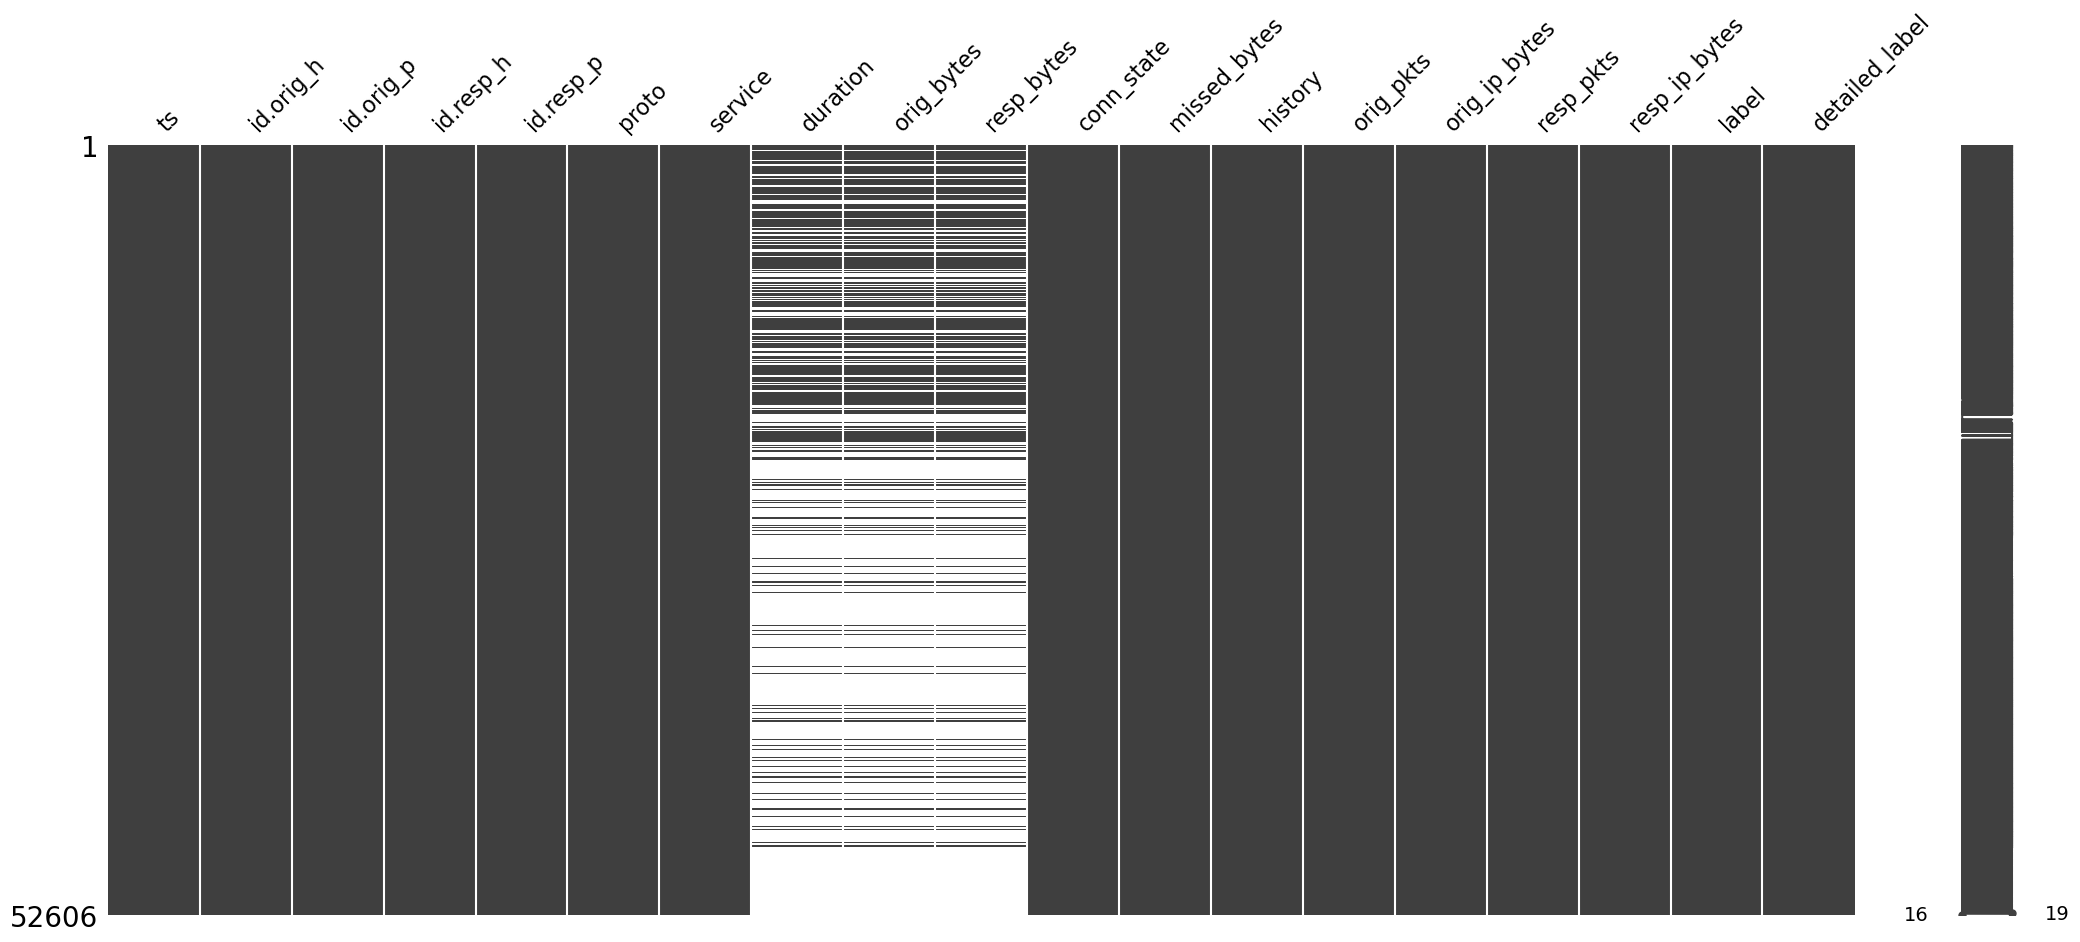

In [8]:
print(df.isnull().sum()) #checking for missing values
missingno.matrix(df) #???

In [6]:
import numpy as np
import pandas as pd

# Define a helper function to handle data type conversion with error handling
def convert_column(df, column_name, dtype):
    try:
        df[column_name] = df[column_name].astype(dtype)
    except (ValueError, TypeError) as e:
        print(f"Error converting column '{column_name}': {e}")

# Convert columns with specified data types
convert_column(df, 'ts', np.int64)
convert_column(df, 'id.resp_p', np.int64)
convert_column(df, 'id.orig_p', np.int64)
convert_column(df, 'proto', str)
convert_column(df, 'service', str)
convert_column(df, 'duration', float)
convert_column(df, 'conn_state', str)
convert_column(df, 'history', str)
convert_column(df, 'orig_pkts', np.int64)
convert_column(df, 'orig_ip_bytes', np.int64)
convert_column(df, 'resp_pkts', np.int64)
convert_column(df, 'resp_ip_bytes', np.int64)
convert_column(df, 'missed_bytes', np.int64)
convert_column(df, 'label', str)
convert_column(df, 'detailed_label', str)
convert_column(df, 'orig_bytes', float)
convert_column(df, 'resp_bytes', float)

# Display the modified DataFrame
df.info()


Error converting column 'ts': invalid literal for int() with base 10: '#fields'
Error converting column 'id.resp_p': invalid literal for int() with base 10: 'id.resp_h'
Error converting column 'id.orig_p': invalid literal for int() with base 10: 'id.orig_h'
Error converting column 'duration': could not convert string to float: 'service'
Error converting column 'orig_pkts': invalid literal for int() with base 10: 'history'
Error converting column 'orig_ip_bytes': invalid literal for int() with base 10: 'orig_pkts'
Error converting column 'resp_pkts': invalid literal for int() with base 10: 'orig_ip_bytes'
Error converting column 'resp_ip_bytes': invalid literal for int() with base 10: 'resp_pkts'
Error converting column 'missed_bytes': invalid literal for int() with base 10: 'local_resp'
Error converting column 'orig_bytes': could not convert string to float: 'duration'
Error converting column 'resp_bytes': could not convert string to float: 'orig_bytes'
<class 'pandas.core.frame.DataFr

In [9]:
df['detailed_label'].value_counts()

malicious    52606
Name: detailed_label, dtype: int64

ValueError: 'label' must be of length 'x'

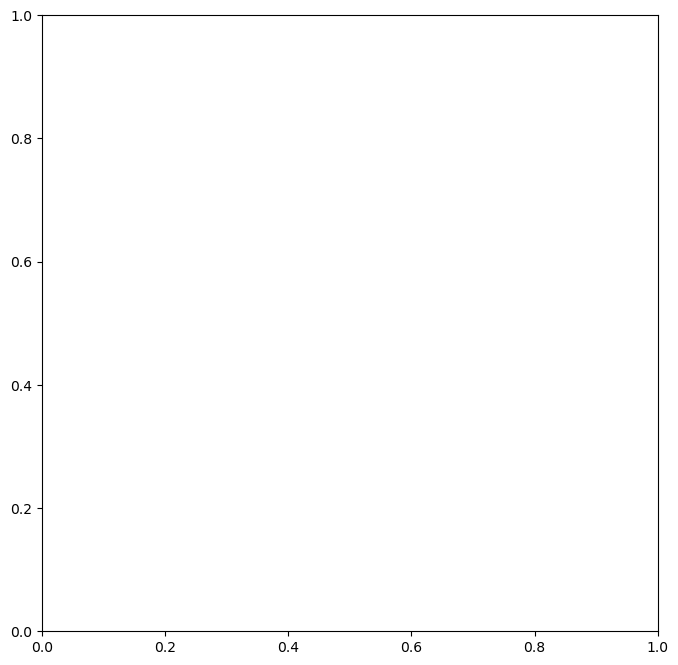

In [11]:
#Importing the modules needed for the follwing script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.pie(df.label.value_counts(), labels = ['benign','malicious'], autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('Pie_chart_binary.png')
plt.show()

In [12]:
df2=pd.read_csv('meged_file.csv')

C:\Users\lif\AppData\Local\Temp\ipykernel_12728\2076964514.py:1: DtypeWarning: Columns (0,2,4,7,8,9,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('meged_file.csv')


In [13]:
df2

ts                 id.orig_h id.orig_p        id.resp_h  \
0      1687210609             192.168.0.146     43387      192.168.0.1   
1      1687210624             192.168.0.146     53324      192.168.0.1   
2      1687210645               192.168.0.1      5353      224.0.0.251   
3      1687210645  fe80::e0e:76ff:fedc:1d2f      5353         ff02::fb   
4      1687210649             192.168.0.146     55892      192.168.0.1   
...           ...                       ...       ...              ...   
37728  1686164129             192.168.0.150     57911    52.184.214.53   
37729  1686001074               192.168.0.1     40018  239.255.255.250   
37730  1686001074         fdf0:f574:be1e::1     50826          ff05::c   
37731  1686001074         fdf0:f574:be1e::1     50826          ff0e::c   
37732  1686001074  fe80::e0e:76ff:fedc:1d2f     50826          ff02::c   

      id.resp_p proto service     duration  orig_bytes resp_bytes conn_state  \
0            53   udp     dns     1.001525           0        121        SHR   
1            53   udp     dns     1.001813           0        866        SHR   
2          5353   udp     dns          NaN         NaN        NaN         S0   
3          5353   udp     dns          NaN         NaN        NaN         S0   
4            53   udp     dns     1.001589           0        113        SHR   
...         ...   ...     ...          ...         ...        ...        ...   
37728       443   tcp     ssl     0.214845      1309.0     3102.0         S1   
37729      1900   udp    None  163171.7984  52909440.0        0.0         S0   
37730      1900   udp    None  163171.8002  53148800.0        0.0         S0   
37731      1900   udp    None  163171.7989  53145196.0        0.0         S0   
37732      1900   udp    None  163171.8008  53148800.0        0.0         S0   

      missed_bytes   history orig_pkts orig_ip_bytes resp_pkts resp_ip_bytes  \
0                0        Cd         0             0         2           177   
1                0        Cd         0             0         7          1062   
2                0         D         1           117         0             0   
3                0         D         1           137         0             0   
4                0        Cd         0             0         2           169   
...            ...       ...       ...           ...       ...           ...   
37728         2433  ShADcgda        12          1801         8          1001   
37729            0         D    119680      56260480         0             0   
37730            0         D    119680      58893440         0             0   
37731            0         D    119672      58889452         0             0   
37732            0         D    119680      58893440         0             0   

       label detailed_label  
0          0         benign  
1          0         benign  
2          0         benign  
3          0         benign  
4          0         benign  
...      ...            ...  
37728      0         benign  
37729      0         benign  
37730      0         benign  
37731      0         benign  
37732      0         benign  

[37733 rows x 19 columns]

In [14]:
df

ts                 id.orig_h id.orig_p       id.resp_h  \
0      1688523383             192.168.0.165     34316     224.0.0.251   
1      1688523383  fe80::577:447c:19ae:cff5     38222        ff02::fb   
2      1688523384             192.168.0.165     60018     224.0.0.251   
3      1688523384  fe80::577:447c:19ae:cff5     57724        ff02::fb   
4      1688523385             192.168.0.165     43083     224.0.0.251   
...           ...                       ...       ...             ...   
52601  1686857466              192.168.1.26     56935    132.163.96.2   
52602  1686857459              192.168.1.26     42699     129.6.15.29   
52603  1686857510              192.168.1.26     52955   192.36.144.22   
52604  1686857467              192.168.1.26     36191  131.107.13.100   
52605  1686857465              192.168.1.26     34069  128.138.140.44   

      id.resp_p proto service  duration orig_bytes resp_bytes conn_state  \
0          5353   udp     dns  0.000936         45          0         S0   
1          5353   udp     dns  0.000944         45          0         S0   
2          5353   udp     dns  0.000799         46          0         S0   
3          5353   udp     dns  0.001447         46          0         S0   
4          5353   udp     dns  0.002282         29          0         S0   
...         ...   ...     ...       ...        ...        ...        ...   
52601       123   udp     ntp       NaN        NaN        NaN         S0   
52602       123   udp     ntp       NaN        NaN        NaN         S0   
52603       123   udp     ntp       NaN        NaN        NaN         S0   
52604       123   udp     ntp       NaN        NaN        NaN         S0   
52605       123   udp     ntp       NaN        NaN        NaN         S0   

      missed_bytes history orig_pkts orig_ip_bytes resp_pkts resp_ip_bytes  \
0                0      CD         1            73         0             0   
1                0      CD         1            93         0             0   
2                0      CD         1            74         0             0   
3                0      CD         1            94         0             0   
4                0      CD         1            57         0             0   
...            ...     ...       ...           ...       ...           ...   
52601            0       D         1            76         0             0   
52602            0       D         1            76         0             0   
52603            0       D         1            76         0             0   
52604            0       D         1            76         0             0   
52605            0       D         1            76         0             0   

       label detailed_label  
0          1      malicious  
1          1      malicious  
2          1      malicious  
3          1      malicious  
4          1      malicious  
...      ...            ...  
52601      1      malicious  
52602      1      malicious  
52603      1      malicious  
52604      1      malicious  
52605      1      malicious  

[52606 rows x 19 columns]

In [16]:
concatenated_df = pd.concat([df, df2])

In [17]:
concatenated_df

ts                 id.orig_h id.orig_p        id.resp_h  \
0      1688523383             192.168.0.165     34316      224.0.0.251   
1      1688523383  fe80::577:447c:19ae:cff5     38222         ff02::fb   
2      1688523384             192.168.0.165     60018      224.0.0.251   
3      1688523384  fe80::577:447c:19ae:cff5     57724         ff02::fb   
4      1688523385             192.168.0.165     43083      224.0.0.251   
...           ...                       ...       ...              ...   
37728  1686164129             192.168.0.150     57911    52.184.214.53   
37729  1686001074               192.168.0.1     40018  239.255.255.250   
37730  1686001074         fdf0:f574:be1e::1     50826          ff05::c   
37731  1686001074         fdf0:f574:be1e::1     50826          ff0e::c   
37732  1686001074  fe80::e0e:76ff:fedc:1d2f     50826          ff02::c   

      id.resp_p proto service     duration  orig_bytes resp_bytes conn_state  \
0          5353   udp     dns     0.000936          45          0         S0   
1          5353   udp     dns     0.000944          45          0         S0   
2          5353   udp     dns     0.000799          46          0         S0   
3          5353   udp     dns     0.001447          46          0         S0   
4          5353   udp     dns     0.002282          29          0         S0   
...         ...   ...     ...          ...         ...        ...        ...   
37728       443   tcp     ssl     0.214845      1309.0     3102.0         S1   
37729      1900   udp    None  163171.7984  52909440.0        0.0         S0   
37730      1900   udp    None  163171.8002  53148800.0        0.0         S0   
37731      1900   udp    None  163171.7989  53145196.0        0.0         S0   
37732      1900   udp    None  163171.8008  53148800.0        0.0         S0   

      missed_bytes   history orig_pkts orig_ip_bytes resp_pkts resp_ip_bytes  \
0                0        CD         1            73         0             0   
1                0        CD         1            93         0             0   
2                0        CD         1            74         0             0   
3                0        CD         1            94         0             0   
4                0        CD         1            57         0             0   
...            ...       ...       ...           ...       ...           ...   
37728         2433  ShADcgda        12          1801         8          1001   
37729            0         D    119680      56260480         0             0   
37730            0         D    119680      58893440         0             0   
37731            0         D    119672      58889452         0             0   
37732            0         D    119680      58893440         0             0   

       label detailed_label  
0          1      malicious  
1          1      malicious  
2          1      malicious  
3          1      malicious  
4          1      malicious  
...      ...            ...  
37728      0         benign  
37729      0         benign  
37730      0         benign  
37731      0         benign  
37732      0         benign  

[90339 rows x 19 columns]

In [19]:
concatenated_df = concatenated_df.reset_index(drop=True)

In [20]:
concatenated_df.to_csv('combined_file.csv')